<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/deeplearning/blob/master/notebooks/3.4_deeplearning_dataaugmentationandtransferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/deeplearning/blob/master/notebooks/3.4_deeplearning_dataaugmentationandtransferlearning.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

### Ejemplo de c√≥digo
# Sesi√≥n 10: *Data Augmentation* y *Transfer Learning*
## Deep Learning y series de tiempo

**Name:** Marco Teran **E-mail:** marco.tulio.teran@gmail.com,
[Website](http://marcoteran.github.io/),
[Github](https://github.com/marcoteran),
[LinkedIn](https://www.linkedin.com/in/marcoteran/).
___

### Importar librer√≠as importantes

Empezamos con las importaciones est√°ndar:

In [3]:
import matplotlib.pyplot as plt

#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.10.1


## Introducci√≥n

* **Data Augmentation:** una t√©cnica popular para mitigar el sobreajuste en modelos de redes neuronales. Mejorar√° el modelo del cap√≠tulo anterior, aumentando su precisi√≥n del 73.9% al 80.1%.
* **Transfer Learning:** permitir√° mejorar a√∫n m√°s el modelo.


T√©cnicas espec√≠ficas para mejorar modelos de redes neuronales
- Feature Extraction: utilizando una red preentrenada, se logra una precisi√≥n del 90.4%.
- Fine-Tuning: utilizando una red preentrenada, se logra una precisi√≥n del 93.1%.

## Data Augmentation

La cantidad de datos disponibles para entrenar el modelo tiene un impacto directo en su capacidad para hacer predicciones precisas.
**Data Augmentation es una t√©cnica que genera m√°s datos de entrenamiento a partir de los datos disponibles.**

- En el caso de im√°genes, se aplican transformaciones aleatorias que producen nuevas im√°genes de aspecto cre√≠ble.
- Data Augmentation ayuda a exponer el modelo a m√°s aspectos de los datos y a generalizar mejor.

### Transformaciones de im√°genes

La t√©cnica de Data Augmentation es muy poderosa para datos de tipo imagen.
* Esta t√©cnica consiste en aplicar transformaciones sencillas (rotar, voltear, etc.) a las im√°genes para obtener nuevas im√°genes plausibles.
* Esto ayuda a exponer el modelo a m√°s aspectos de los datos y a generalizar mejor.

Es importante tener cuidado al elegir las t√©cnicas de aumento de datos utilizadas.
- Se debe tener en cuenta el contexto del conjunto de datos de entrenamiento y el conocimiento del dominio del problema.
- De esta manera, se evita generar im√°genes que nunca podr√≠an encontrarse en realidad, lo que empeorar√≠a el entrenamiento.

En **Keras**, se puede realizar f√°cilmente mediante la configuraci√≥n de una serie de transformaciones que se realizar√°n en las im√°genes le√≠das por la instancia de `ImageDataGenerator`.
- Para obtener informaci√≥n detallada sobre las transformaciones disponibles, se puede consultar la API preprocessing de Keras.

Es importante destacar que la transformaci√≥n se realiza de manera online durante el procesamiento. Esto permite hacer el proceso autom√°tico durante el entrenamiento sin necesidad de modificar los datos almacenados en disco. De esta manera, el modelo ve una imagen generada aleatoriamente una sola vez. Sin embargo, tambi√©n se pueden realizar las transformaciones previamente y a√±adirlas al conjunto de datos de entrenamiento. Esto acelerar√≠a el preprocesado, pero aumentar√≠a el espacio de almacenamiento y el tiempo de carga de los datos en memoria.

#### Configuraci√≥n de ImageGenerator

Para aplicar la t√©cnica de Data Augmentation, se deben pasar nuevos argumentos al objeto ImageGenerator de los datos de entrenamiento bas√°ndose en el modelo presentado en el cap√≠tulo anterior. Algunos de los par√°metros que se pueden utilizar son:

```Python
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* `rotation_range` es un valor en grados (0-180) que indica el rango dentrodel cual se pueden rotar im√°genes al azar.
* `width_shift` y height_shift son rangos (como una fracci√≥n del ancho y la altura total) dentro de los cuales se pueden trasladar las im√°genes alazar verticalmente u horizontalmente.
* `shear_range` sirve para aplicar transformaciones de corte al azar.
* `zoom_range` sirve para aplicar zoom aleatorio dentro de las im√°genes
* `horizontal_flip` sirve para voltear aleatoriamente la mitad de las im√°genes horizontalmente (en nuestro caso de estudio no tiene sentido voltear verticalmente las im√°genes).
* `fill_mode` es la estrategia utilizada para rellenar los p√≠xeles reci√©ncreados que pueden aparecer despu√©s de una de las transformaciones anteriores.

Estas son solo algunas de las opciones disponibles de transformaci√≥n. Todas las restantes se pueden consultar en la p√°gina web de la API preprocessing de Keras.

In [ ]:
from google.colab import files
import os
import zipfile

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from tensorflow.keras.preprocessing import image
 
uploaded=files.upload()
for fn in uploaded.keys():
    path='/content/' + fn
    img=image.load_img(path)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
  
    # example of "rotation_range"
    datagen = ImageDataGenerator(rotation_range=45)

    it = datagen.flow(samples, batch_size=1)
    for i in range(6):
        pyplot.subplot(230 + 1 + i)
        batch = it.next()
        image = batch[0].astype('uint8')
        pyplot.imshow(image)
pyplot.show()

Se puede observar c√≥mo se han generado varias im√°genes de manera aleatoria a partir de la imagen original utilizando el argumento `rotation_range`.
Se sugiere probar con otros argumentos utilizando este c√≥digo como referencia.

## Carga de la base de datos

In [ ]:
%%capture
#!wget -O cats_and_dogs_small.zip https://github.com/marcoteran/deeplearning/raw/master/notebooks/cats_and_dogs_small.zip
#!unzip data.zip

In [6]:
base_dir = 'cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

A continuaci√≥n se imprimen en la consola el n√∫mero total de im√°genes que hay en los directorios correspondientes a los conjuntos de entrenamiento, validaci√≥n y prueba, tanto de gatos como de perros.

In [7]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


### Aumentaci√≥n de los datos

* El aumento de datos de imagen se aplica generalmente solo al conjunto de datos de entrenamiento, y no al conjunto de datos de validaci√≥n o prueba.
* Esto difiere de la preparaci√≥n de datos, como el cambio de tama√±o de la imagen y la escala de p√≠xeles, que se aplica a todos los conjuntos de datos.

Para nuestro caso de estudio, los generadores se pueden especificar de la siguiente forma:

La l√≠nea de c√≥digo importa la clase ImageDataGenerator del m√≥dulo tensorflow.keras.preprocessing.image de TensorFlow, que permite crear generadores de datos de imagen para su uso en el entrenamiento de modelos de Deep Learning.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Se define un objeto ImageDataGenerator que se utiliza para realizar un aumento de datos en las im√°genes de entrenamiento para el modelo de Deep Learning, especificando diversas t√©cnicas de transformaci√≥n de im√°genes.

Los valores de los argumentos especifican:
- El rango de rotaci√≥n permitido (40 grados)
- El rango de desplazamiento horizontal y vertical (0.2)
- La intensidad de la deformaci√≥n de la imagen (0.2)
- El rango de zoom (0.2), si se aplica o no un volteo horizontal
- El modo de llenado para los p√≠xeles que se a√±aden despu√©s de la rotaci√≥n o el desplazamiento. 
- El rescale=1./255 normaliza los valores de los p√≠xeles en el rango \[0,1\]

In [2]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [3]:
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

Estas l√≠neas de c√≥digo generan tres grupos de datos de im√°genes (entrenamiento, validaci√≥n y prueba) y los cargan utilizando diferentes transformaciones y configuraciones de procesamiento de imagen.

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Creaci√≥n del modelo CNN con DA: Modelo CNN con *Data Augmentation*

Estas l√≠neas de c√≥digo importan m√≥dulos y clases espec√≠ficas de la biblioteca Keras de TensorFlow para construir y entrenar modelos de redes neuronales convolucionales mediante el uso de capas de convoluci√≥n, agrupamiento, aplanamiento y densas, as√≠ como el optimizador RMSprop.

In [9]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

#### Definici√≥n de una red convolucional de m√°s capas

Se define un modelo de red neuronal convolucional (CNN) usando la API Sequential de Keras.
- La red consiste en varias capas convolucionales, capas de pooling, capas completamente conectadas y una capa de salida que utiliza la funci√≥n de activaci√≥n sigmoid para clasificar im√°genes como pertenecientes a una de dos clases.
- La entrada del modelo es una imagen RGB de 150x150 p√≠xeles y la salida es una probabilidad de pertenencia a la clase positiva.

In [10]:
modelDA = Sequential()
modelDA.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
modelDA.add(MaxPooling2D(2, 2))
modelDA.add(Conv2D(64, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Flatten())
modelDA.add(Dense(512, activation='relu'))
modelDA.add(Dense(1, activation='sigmoid'))

Comprobar la estructura de la red

In [11]:
modelDA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Compilaci√≥n del modelo

Se compila el modelo de deep learning `modelDA` para entrenar una tarea de clasificaci√≥n binaria utilizando la funci√≥n de p√©rdida `binary_crossentropy`, el optimizador `RMSprop` con una tasa de aprendizaje de $10^{-4}$ y como m√©trica de evaluaci√≥n se utiliza la precisi√≥n (`acc`).

In [12]:
modelDA.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\marco\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Entrenamiento de la red

Ahora que ya se ha definido la estructura de red, el optimizador, learning rate y metricas ya se puede entrenar la red.

In [13]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA = modelDA.fit(
    train_generator,
    steps_per_epoch= steps_per_epoch,
    epochs= 100,
    validation_data= validation_generator,
    validation_steps= validation_steps,
    verbose=2)

Epoch 1/100
100/100 - 22s - loss: 0.6946 - acc: 0.5035 - val_loss: 0.6830 - val_acc: 0.5000 - 22s/epoch - 225ms/step
Epoch 2/100
100/100 - 14s - loss: 0.6794 - acc: 0.5500 - val_loss: 0.6568 - val_acc: 0.5780 - 14s/epoch - 139ms/step
Epoch 3/100
100/100 - 14s - loss: 0.6546 - acc: 0.6015 - val_loss: 0.6593 - val_acc: 0.5860 - 14s/epoch - 138ms/step
Epoch 4/100
100/100 - 14s - loss: 0.6340 - acc: 0.6340 - val_loss: 0.6799 - val_acc: 0.5720 - 14s/epoch - 136ms/step
Epoch 5/100
100/100 - 14s - loss: 0.6276 - acc: 0.6395 - val_loss: 0.6404 - val_acc: 0.6400 - 14s/epoch - 138ms/step
Epoch 6/100
100/100 - 14s - loss: 0.6169 - acc: 0.6555 - val_loss: 0.6337 - val_acc: 0.6190 - 14s/epoch - 143ms/step
Epoch 7/100
100/100 - 14s - loss: 0.6058 - acc: 0.6675 - val_loss: 0.6321 - val_acc: 0.6230 - 14s/epoch - 136ms/step
Epoch 8/100
100/100 - 13s - loss: 0.5925 - acc: 0.6780 - val_loss: 0.6090 - val_acc: 0.6480 - 13s/epoch - 133ms/step
Epoch 9/100
100/100 - 13s - loss: 0.5933 - acc: 0.6790 - val_los

Epoch 71/100
100/100 - 14s - loss: 0.3870 - acc: 0.8235 - val_loss: 0.4672 - val_acc: 0.7960 - 14s/epoch - 136ms/step
Epoch 72/100
100/100 - 14s - loss: 0.3996 - acc: 0.8165 - val_loss: 0.4792 - val_acc: 0.7730 - 14s/epoch - 137ms/step
Epoch 73/100
100/100 - 13s - loss: 0.3886 - acc: 0.8275 - val_loss: 0.4907 - val_acc: 0.7530 - 13s/epoch - 135ms/step
Epoch 74/100
100/100 - 13s - loss: 0.3902 - acc: 0.8185 - val_loss: 0.5068 - val_acc: 0.7580 - 13s/epoch - 135ms/step
Epoch 75/100
100/100 - 13s - loss: 0.3983 - acc: 0.8210 - val_loss: 0.4300 - val_acc: 0.8050 - 13s/epoch - 132ms/step
Epoch 76/100
100/100 - 13s - loss: 0.3907 - acc: 0.8200 - val_loss: 0.4750 - val_acc: 0.7790 - 13s/epoch - 132ms/step
Epoch 77/100
100/100 - 13s - loss: 0.3864 - acc: 0.8270 - val_loss: 0.5242 - val_acc: 0.7550 - 13s/epoch - 133ms/step
Epoch 78/100
100/100 - 13s - loss: 0.3874 - acc: 0.8285 - val_loss: 0.4240 - val_acc: 0.8070 - 13s/epoch - 132ms/step
Epoch 79/100
100/100 - 13s - loss: 0.3916 - acc: 0.8250 

### Evaluaci√≥n de la red

Para ver si la red ha aprendido a clasificar bien los n√∫meros manuscritos hay que comprobar la precisi√≥n que obtiene en el conjunto de datos de test. Para este conjunto no ha sido entrenada la red.

In [14]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= modelDA.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

100
50
50/50 [==============================] - 2s 42ms/step - loss: 0.4473 - acc: 0.8030
Test Accuracy: 0.8029999732971191


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

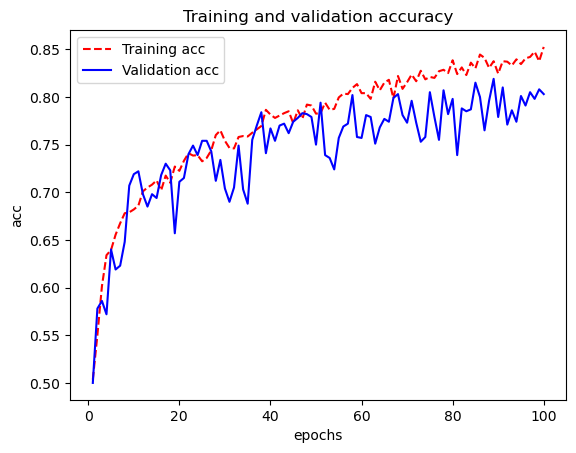

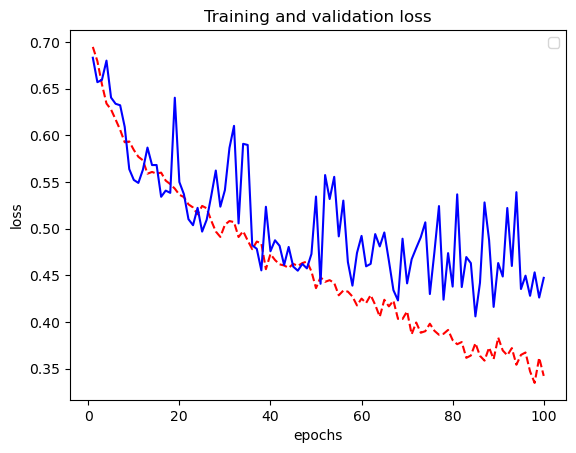

<Figure size 640x480 with 0 Axes>

In [15]:
acc      = historyDA.history['acc' ]
val_acc  = historyDA.history['val_acc']
loss     = historyDA.history['loss' ]
val_loss = historyDA.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener n√∫mero de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()



* La t√©cnica se basa en mezclar informaci√≥n existente, lo que puede no ser suficiente para eliminar por completo el sobreajuste en algunos casos.
* Para mitigar el sobreentrenamiento, se pueden a√±adir t√©cnicas como la regularizaci√≥n o Dropout.
* Sin embargo, en algunos casos, a√∫n no es suficiente obtener mejores modelos debido a la falta de datos.
* Por lo tanto, se presenta otra oportunidad en la siguiente secci√≥n: usar modelos preentrenados

En resumen, se observ√≥ c√≥mo **Data Augmentation** es una t√©cnica √∫til para reducir el overfitting en modelos de im√°genes. Sin embargo, hay *limitaciones* en la capacidad de descubrir nuevas caracter√≠sticas de los datos.
Esto se debe a que, al tener un conjunto de datos de entrenamiento peque√±o, la t√©cnica de **Data Augmentation** solo puede mezclar la informaci√≥n existente y no generar informaci√≥n nueva.

___

# Transfer Learning

**Transfer Learning** es una t√©cnica central en Deep Learning que permite entrenar una red neuronal a partir de una red preentrenada en lugar de entrenarla desde cero.
- Esta t√©cnica se utiliza para reducir el tiempo y el costo requeridos para entrenar una red neuronal desde cero, ya que utiliza los par√°metros de una red preentrenada como punto de partida para entrenar el modelo.

Las **caracter√≠sticas aprendidas** por la red preentrenada pueden ser √∫tiles para muchos problemas diferentes de visi√≥n por computadora, a pesar de que estos nuevos problemas pueden involucrar clases completamente diferentes a las de la tarea original.

Existen dos formas de utilizar una red preentrenada:

- **Feature Extraction:** se utiliza la red preentrenada como un extractor de caracter√≠sticas para un nuevo conjunto de datos.
- **Fine-Tuning:** se ajustan los par√°metros de la red preentrenada para que se adapte a un nuevo conjunto de datos.

En una red neuronal convolucional, las primeras capas son las encargadas de aprender caracter√≠sticas m√°s gen√©ricas, y estas caracter√≠sticas aprendidas pueden ser f√°cilmente reutilizadas en otros problemas.

La portabilidad de las caracter√≠sticas aprendidas a trav√©s de diferentes problemas es una de las virtudes clave del Transfer Learning en Deep Learning, y su utilizaci√≥n puede crear modelos de visi√≥n potentes con muy pocos datos.

### Feature Extraction

El **Feature Extraction** es una t√©cnica utilizada para extraer caracter√≠sticas relevantes de nuevos datos, utilizando los par√°metros aprendidos por una red preentrenada. Estas caracter√≠sticas se procesan a trav√©s de un nuevo clasificador que se entrena desde cero.

Las **ConvNet* utilizadas para clasificar im√°genes se componen de dos partes:
1. Una serie de capas de convoluciones y pooling
2. Un clasificador formado habitualmente por una o varias capas densas.

La primera parte se llama base convolucional del modelo.
La extracci√≥n de caracter√≠sticas consiste en tomar la base convolucional de una red previamente entrenada, ejecutar los nuevos datos a trav√©s de ella y entrenar a un nuevo clasificador en la parte de la salida.

La **reutilizaci√≥n de la base convolucional** es √∫til ya que las caracter√≠sticas aprendidas por la red preentrenada son portables a otros problemas del mismo √°mbito.

Las representaciones encontradas en capas densamente conectadas ya no mantienen informaci√≥n sobre d√≥nde se encuentran los objetos en la imagen de entrada, a diferencia de las capas convolucionales.

La **API de Keras** permite aplicar esta t√©cnica de manera f√°cil y con pocas l√≠neas de c√≥digo.
* **Keras** permite descargar un modelo y luego configurar c√≥mo este debe ser entrenado, indicando qu√© capas son entrenables (**Trainable layers**) y qu√© capas no (**Frozen layers**).
* En el caso de visi√≥n por computador, muchos modelos preentrenados con **ImageNet** est√°n disponibles en la mayor√≠a de librer√≠as de desarrollo de Deep Learning, como es el caso de Keras.

En concreto en la p√°gina de modelos preentrenados ``tf.keras.applications`` podemos encontrar disponibles los siguientes modelos para clasificaci√≥n de im√°genes entrenados con **ImageNet**:
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet

###  VGG16: Modelo con *Feature Extraction*

Se utilizar√° la red neuronal **VGG16** con arquitectura convolucional para resolver el problema de clasificaci√≥n de perros contra gatos. Algunas caracter√≠sticas de esta red neuronal son:

* **VGG16** ha sido entrenada previamente en el conjunto de datos **ImageNet**, que contiene 1.4 millones de im√°genes en 1000 clases diferentes.
* **ImageNet** incluye diversas clases de animales, incluyendo diferentes especies de gatos y perros, lo que sugiere que VGG16 deber√≠a tener un buen rendimiento en este problema de clasificaci√≥n.
* La red neuronal VGG16 fue propuesta por *Karen Simonyan* y *Andrew Zisserman* en su art√≠culo *"Very Deep Convolutional Networks for Large-Scale Image Recognition"*.
* VGG16 es una red neuronal de **16 capas** que utiliza convoluciones para extraer caracter√≠sticas de las im√°genes.

El modelo VGG16 podemos importarlo desde el m√≥dulo ``keras.applications``

In [4]:
from tensorflow.keras.applications import VGG16

A este constructor de la red VGG16 se le pasan tres argumentos.
1. La forma de los tensores de im√°genes que alimentar√°n a la red (es un argumento opcional).
2. El argumento `include_top` indica si se debe incluir (o no) el clasificador en la √∫ltima capa de la red. 
    * Este caso, esta capa corresponde a la capa que clasifica las 1000 clases de ImageNet. Debido a que tenemos la intenci√≥n de usar nuestro propio clasificador (que clasifica solo dos clases: gato y perro) no necesitamos incluirla.
3. El √∫ltimo argumento, `weights`, indica de d√≥nde se obtiene la informaci√≥n para iniciar los pesos de los par√°metros de la red (en nuestro caso usaremos ImageNet)

In [5]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

58889256/58889256 [==============================] - 19s 0us/step


Con el m√©todo ``summary()`` podemos saber el detalle de la arquitectura de la base convolucional VGG16:

In [18]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

La red neuronal **VGG16** no incluye las dos capas finales fully-connected de 4096 neuronas ni la de 1000 neuronas (cada una representa una categor√≠a de im√°genes de ImageNet) si se establece el valor **`False`** del argumento `include_top`.
* No se requieren estas capas porque se crear√°n unas propias para construir un clasificador.
* El clasificador se usar√° para predecir si las im√°genes son un perro o un gato.
* El √∫ltimo feature map de forma y tama√±o (4, 4, 512) que devuelve la base convolucional VGG16 ser√° la entrada para el clasificador.

**Importante:** Antes de entrenar el modelo es necesario indicar cual de las capas de la base convolucional **no deben ser entrenadas**, lo que se denomina ¬´congelar¬ª capas (Freeze layers).

Congelar una capa o un conjunto de capas significa evitar que sus pesos se actualicen durante el entrenamiento.
* Si no se hiciera esto, los valores que fueron previamente aprendidos por la base convolucional ser√≠an modificados durante el entrenamiento, efecto que no se busca.
* En Keras, congelar una capa se realiza estableciendo su atributo trainable a False

Se recorren todas las capas de la red pre-entrenada (pre_trained_model) y se establece el atributo `trainable` de cada capa en **`False`**.

In [6]:
for layer in pre_trained_model.layers:
    layer.trainable = False

Al establecer este atributo en False, se evita que los pesos de las capas se actualicen durante el entrenamiento del modelo en el nuevo conjunto de datos. En cambio, se conservan los pesos previamente aprendidos por la red pre-entrenada.

In [19]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

En Keras los modelos los podemos considerar como capas y, por tanto, podemos agregar un modelo (como `pre_trained_model`) a un modelo secuencial al igual que agregar√≠amos una capa:

In [20]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Se define una red neuronal llamada `modelFE` que utiliza transferencia de aprendizaje para extraer caracter√≠sticas √∫tiles de las im√°genes de entrada utilizando una red neuronal pre-entrenada `pre_trained_model` y luego entrena una capa clasificadora adicional en la parte superior para clasificar las im√°genes en dos clases.

In [21]:
modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))

- `modelFE.add(Dense(256, activation='relu'))` agrega una capa densa de 256 neuronas con funci√≥n de activaci√≥n ReLU, que tiene la tarea de aprender a clasificar las caracter√≠sticas extra√≠das de la imagen de entrada en clases.

- `modelFE.add(Dense(1, activation='sigmoid'))` agrega una capa densa de una sola neurona con funci√≥n de activaci√≥n sigmoidal que se encarga de generar la salida de la red. La salida es un n√∫mero entre 0 y 1 que representa la probabilidad de que la imagen de entrada pertenezca a la clase positiva.

As√≠ es como el m√©todo `summary()` presenta la red neuronal que se acaba de construir:

In [22]:
modelFE.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Realizamos el preprocesado de **Data Augmentation**. El siguiente c√≥digo genera tres objetos `ImageDataGenerator` para aumentar y escalar las im√°genes de entrenamiento, validaci√≥n y prueba, respectivamente.

Luego, utiliza el m√©todo `flow_from_directory` para cargar las im√°genes de cada conjunto y aplicar las transformaciones definidas en los ImageDataGenerators.

In [23]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Se compila red utilizando los mismos parametros anteriores

In [24]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Se comienza a entrenar el modelo con el m√©todo ``fit()``, con la misma configuraci√≥n de Data Augmentation que utilizamos en la secci√≥n anterior.

Pero no es necesariamente siempre la mejor opci√≥n; la mejor combinaci√≥n de t√©cnicas depende del tipo y cantidad de datos disponibles.

In [25]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/100
100/100 - 15s - loss: 0.5444 - acc: 0.7125 - val_loss: 0.3258 - val_acc: 0.8520 - 15s/epoch - 150ms/step
Epoch 2/100
100/100 - 13s - loss: 0.4225 - acc: 0.8120 - val_loss: 0.2831 - val_acc: 0.8870 - 13s/epoch - 135ms/step
Epoch 3/100
100/100 - 13s - loss: 0.3925 - acc: 0.8170 - val_loss: 0.2586 - val_acc: 0.8910 - 13s/epoch - 133ms/step
Epoch 4/100
100/100 - 13s - loss: 0.3777 - acc: 0.8300 - val_loss: 0.2631 - val_acc: 0.8790 - 13s/epoch - 134ms/step
Epoch 5/100
100/100 - 13s - loss: 0.3646 - acc: 0.8320 - val_loss: 0.2501 - val_acc: 0.8910 - 13s/epoch - 134ms/step
Epoch 6/100
100/100 - 13s - loss: 0.3518 - acc: 0.8480 - val_loss: 0.2583 - val_acc: 0.8920 - 13s/epoch - 133ms/step
Epoch 7/100
100/100 - 13s - loss: 0.3247 - acc: 0.8480 - val_loss: 0.2505 - val_acc: 0.8960 - 13s/epoch - 133ms/step
Epoch 8/100
100/100 - 13s - loss: 0.3191 - acc: 0.8580 - val_loss: 0.2692 - val_acc: 0.8880 - 13s/epoch - 135ms/step
Epoch 9/100
100/100 - 13s - loss: 0.3228 - acc: 0.8525 - val_los

Epoch 71/100
100/100 - 14s - loss: 0.1860 - acc: 0.9300 - val_loss: 0.2749 - val_acc: 0.9070 - 14s/epoch - 142ms/step
Epoch 72/100
100/100 - 14s - loss: 0.1947 - acc: 0.9155 - val_loss: 0.2781 - val_acc: 0.9100 - 14s/epoch - 140ms/step
Epoch 73/100
100/100 - 14s - loss: 0.1974 - acc: 0.9155 - val_loss: 0.2756 - val_acc: 0.9080 - 14s/epoch - 142ms/step
Epoch 74/100
100/100 - 14s - loss: 0.1816 - acc: 0.9230 - val_loss: 0.2686 - val_acc: 0.9150 - 14s/epoch - 144ms/step
Epoch 75/100
100/100 - 15s - loss: 0.1999 - acc: 0.9150 - val_loss: 0.2736 - val_acc: 0.9170 - 15s/epoch - 148ms/step
Epoch 76/100
100/100 - 15s - loss: 0.1975 - acc: 0.9175 - val_loss: 0.2765 - val_acc: 0.9030 - 15s/epoch - 147ms/step
Epoch 77/100
100/100 - 14s - loss: 0.1862 - acc: 0.9205 - val_loss: 0.2713 - val_acc: 0.9110 - 14s/epoch - 144ms/step
Epoch 78/100
100/100 - 14s - loss: 0.1724 - acc: 0.9330 - val_loss: 0.2811 - val_acc: 0.9060 - 14s/epoch - 144ms/step
Epoch 79/100
100/100 - 14s - loss: 0.1901 - acc: 0.9235 

Comprobar la precisi√≥n con los datos de prueba

In [26]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 2s 44ms/step - loss: 0.2953 - acc: 0.9060
Test Accuracy: 0.906000018119812


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

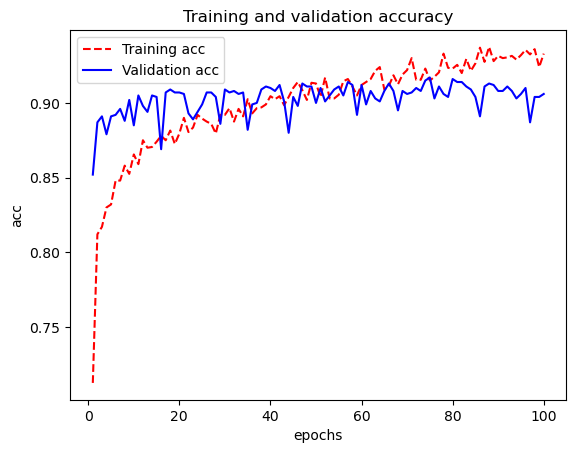

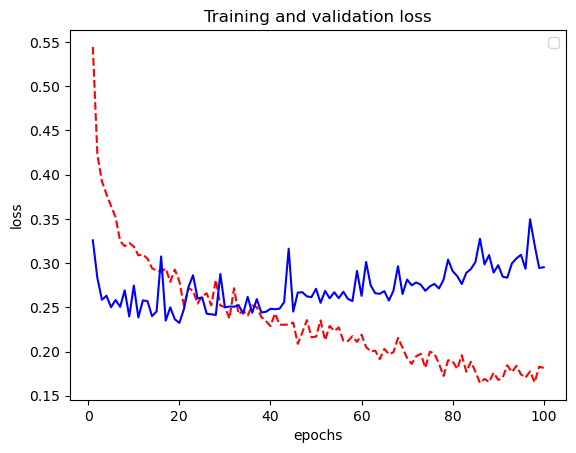

<Figure size 640x480 with 0 Axes>

In [27]:
acc      = historyFE.history['acc']
val_acc  = historyFE.history[ 'val_acc']
loss     = historyFE.history['loss']
val_loss = historyFE.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener n√∫mero de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()

## Fine-Tuning

La t√©cnica de **Fine-Tuning** es complementaria a la **Feature Extraction** y se utiliza ampliamente en la reutilizaci√≥n de modelos.
Consiste en hacer un *ajuste m√°s fino* y entrenar algunas de las capas finales de la *base convolucional* del modelo usado para la extracci√≥n de caracter√≠sticas, junto con la parte agregada del clasificador.

El *ajuste fino* de las representaciones m√°s abstractas del modelo se realiza en **Fine-Tuning**.

El nivel de generalizaci√≥n y, por lo tanto, de reutilizaci√≥n de las representaciones extra√≠das por capas de convoluci√≥n espec√≠ficas depende de la posici√≥n de la capa en el modelo.
* Las primeras capas aprenden caracter√≠sticas generales y, despu√©s, gradualmente en capas sucesivas se van aprendiendo caracter√≠sticas m√°s concretas del dominio de problema que estamos tratando.
* Las capas del modelo que est√°n m√°s pr√≥ximas a la capa de entrada de datos extraen mapas de caracter√≠sticas locales altamente gen√©ricas, mientras que las capas que est√°n m√°s cerca del clasificador final extraen conceptos m√°s abstractos.

La base convolucional VGG16 se compone de 5 bloques: *block1, block2, block3, block4, block5.*

Para mostrar la t√©cnica de Fine-Tuning se entrenar√° el *block5* de VGG16 compuesto por tres capas convolucionales y una de pooling *(block5_conv1, block5_conv2 y block5_conv3 ser√°n ahora entrenables)*.

### VGG16 : Modelo con *Fine Tuning*

El c√≥digo en Keras que permite especificar este comportamiento en la fase de entrenamiento que acabamos de describir puede ser el siguiente:

In [28]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable: 
        layer.trainable = True
    else:
        layer.trainable = False

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Definamos igual que antes la red:

In [29]:
modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256, activation='relu'))
modelFT.add(Dense(1, activation='sigmoid'))

Ahora el pre_trained_model tendr√° m√°s capas a entrenar, como podemos ver con la salida del m√©todo summary()

In [30]:
modelFT.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


#### Compilaci√≥n y entrenamiento de la red

Se usar√°n los mismos hiperpar√°metros (optimizador RMSProp con learning rate de 1e-4), pero es importante dejar claro, para aquellos que quieran profundizar m√°s en el tema, que estos hiperpar√°metros juegan un papel fundamental.
* En general es una buena pr√°ctica usar un learning rate muy peque√±o para limitar la magnitud de las modificaciones que se realizan en las tres capas del *block5* que est√° ajustando.
* Los **learning rate** que son demasiado grandes pueden da√±ar los pesos previos que ven√≠an de la red preentrenada, ya que manten√≠an informaci√≥n importante para representar a las caracter√≠sticas.

In [31]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), 
              metrics=['acc'])

Generaci√≥n del conjunto de datos aumentados

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Entrenamiento del modelo

In [33]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_steps = validation_steps,
    verbose = 2)

Epoch 1/100
100/100 - 15s - loss: 0.5224 - acc: 0.7475 - val_loss: 0.2829 - val_acc: 0.8650 - 15s/epoch - 146ms/step
Epoch 2/100
100/100 - 14s - loss: 0.3414 - acc: 0.8475 - val_loss: 0.2349 - val_acc: 0.9040 - 14s/epoch - 136ms/step
Epoch 3/100
100/100 - 14s - loss: 0.2845 - acc: 0.8795 - val_loss: 0.2038 - val_acc: 0.9140 - 14s/epoch - 138ms/step
Epoch 4/100
100/100 - 14s - loss: 0.2617 - acc: 0.8935 - val_loss: 0.2388 - val_acc: 0.9010 - 14s/epoch - 139ms/step
Epoch 5/100
100/100 - 14s - loss: 0.2431 - acc: 0.9085 - val_loss: 0.2679 - val_acc: 0.9030 - 14s/epoch - 138ms/step
Epoch 6/100
100/100 - 15s - loss: 0.2567 - acc: 0.8940 - val_loss: 0.1779 - val_acc: 0.9310 - 15s/epoch - 154ms/step
Epoch 7/100
100/100 - 14s - loss: 0.1935 - acc: 0.9210 - val_loss: 0.1542 - val_acc: 0.9400 - 14s/epoch - 143ms/step
Epoch 8/100
100/100 - 14s - loss: 0.1861 - acc: 0.9245 - val_loss: 0.1557 - val_acc: 0.9310 - 14s/epoch - 138ms/step
Epoch 9/100
100/100 - 14s - loss: 0.1989 - acc: 0.9220 - val_los

Epoch 71/100
100/100 - 15s - loss: 0.0647 - acc: 0.9845 - val_loss: 0.9261 - val_acc: 0.9440 - 15s/epoch - 152ms/step
Epoch 72/100
100/100 - 15s - loss: 0.1199 - acc: 0.9750 - val_loss: 0.8657 - val_acc: 0.9390 - 15s/epoch - 145ms/step
Epoch 73/100
100/100 - 15s - loss: 0.0676 - acc: 0.9825 - val_loss: 0.9255 - val_acc: 0.9380 - 15s/epoch - 145ms/step
Epoch 74/100
100/100 - 15s - loss: 0.0749 - acc: 0.9810 - val_loss: 2.3126 - val_acc: 0.9370 - 15s/epoch - 151ms/step
Epoch 75/100
100/100 - 14s - loss: 0.0937 - acc: 0.9760 - val_loss: 1.8147 - val_acc: 0.9340 - 14s/epoch - 145ms/step
Epoch 76/100
100/100 - 14s - loss: 0.0874 - acc: 0.9820 - val_loss: 0.5635 - val_acc: 0.9310 - 14s/epoch - 145ms/step
Epoch 77/100
100/100 - 15s - loss: 0.1092 - acc: 0.9785 - val_loss: 0.7036 - val_acc: 0.9390 - 15s/epoch - 150ms/step
Epoch 78/100
100/100 - 15s - loss: 0.1245 - acc: 0.9770 - val_loss: 0.2995 - val_acc: 0.9340 - 15s/epoch - 145ms/step
Epoch 79/100
100/100 - 15s - loss: 0.0653 - acc: 0.9795 

Igual que en los anteriores modelos, se verifica gr√°ficamente c√≥mo evoluciona el entrenamiento en las gr√°ficas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

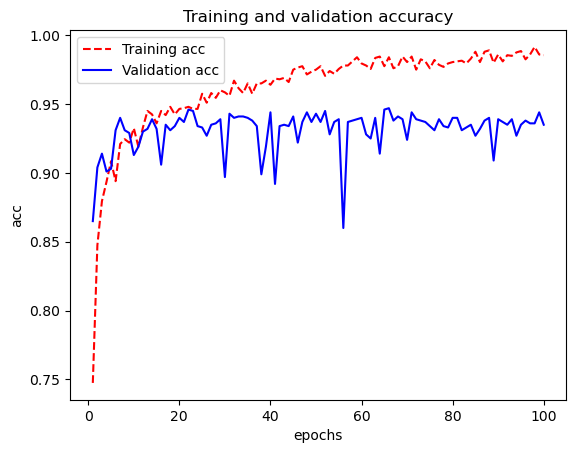

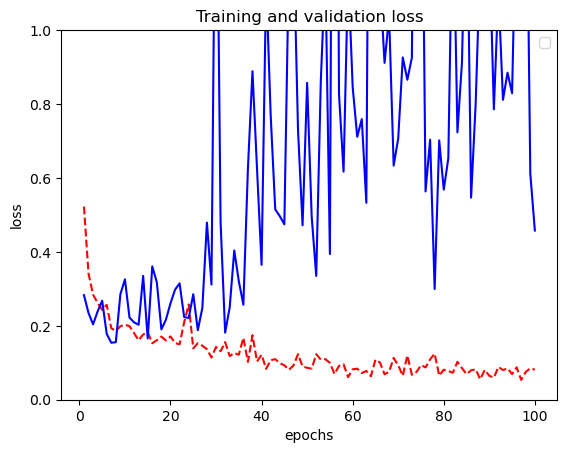

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

acc      = historyFT.history['acc']
val_acc  = historyFT.history['val_acc']
loss     = historyFT.history['loss']
val_loss = historyFT.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener n√∫mero de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,1)

plt.legend()
plt.figure()

Con los datos de pruebapara confirmar la mejora observada ya en el historial de entrenamiento

In [35]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 2s 47ms/step - loss: 0.4577 - acc: 0.9350
Test Accuracy: 0.9350000023841858


<Figure size 640x480 with 0 Axes>

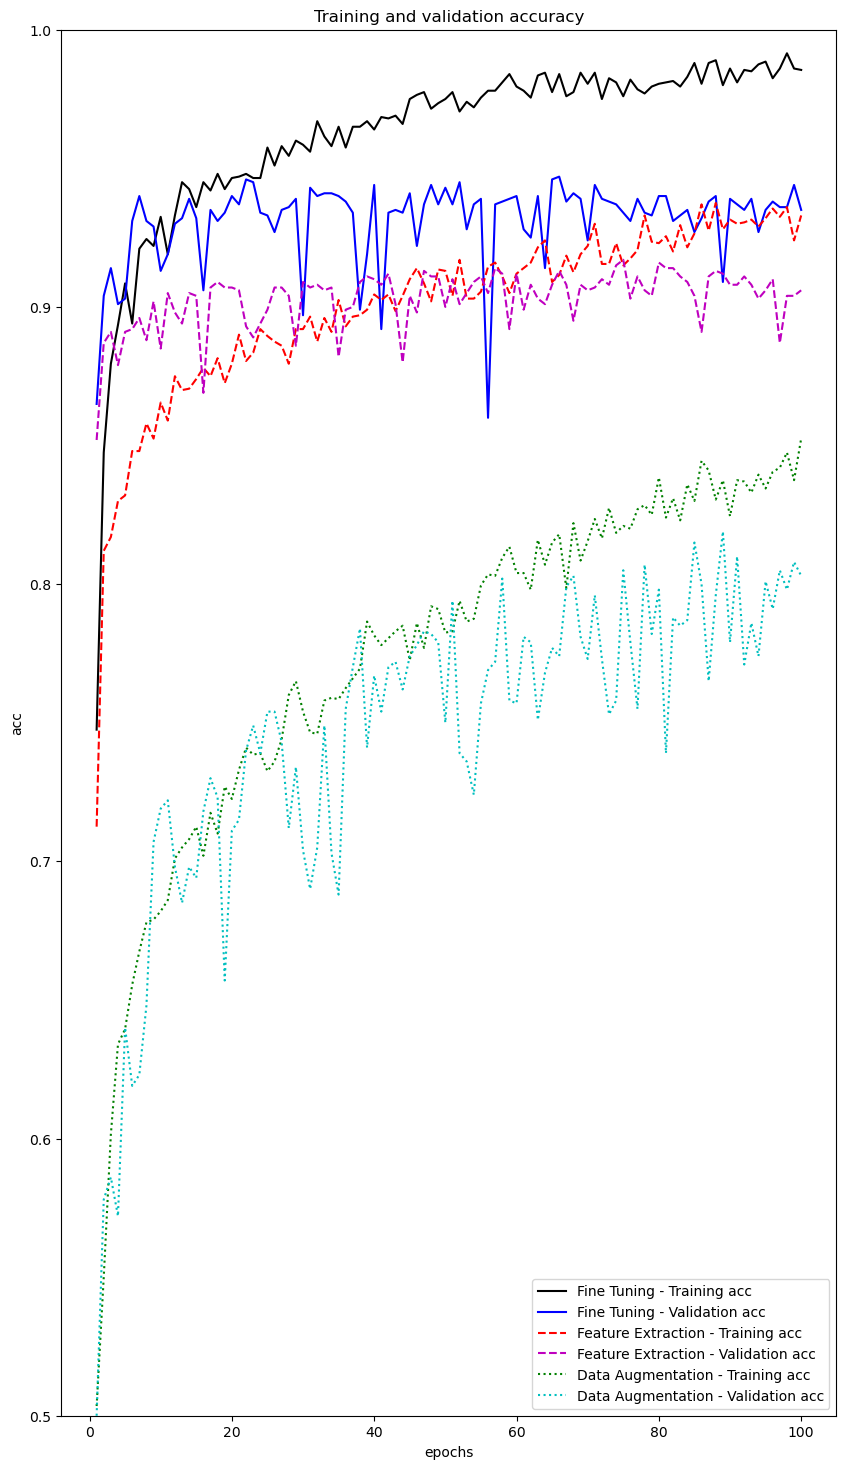

<Figure size 640x480 with 0 Axes>

In [36]:
accDA      = historyDA.history['acc']
val_accDA  = historyDA.history['val_acc']

accFE      = historyFE.history['acc']
val_accFE  = historyFE.history['val_acc']

accFT      = historyFT.history['acc']
val_accFT  = historyFT.history['val_acc']

epochs    = range(1,len(accDA)+1,1) 

plt.figure(figsize=(10,18))

plt.plot(epochs, accFT,'k', label='Fine Tuning - Training acc')
plt.plot(epochs, val_accFT,'b', label='Fine Tuning - Validation acc')

plt.plot(epochs, accFE, 'r--', label='Feature Extraction - Training acc')
plt.plot(epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot(epochs, accDA, 'g:', label='Data Augmentation - Training acc')
plt.plot(epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()

Prueba con fotograf√≠as propias

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = modelFT.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " es un PERRO")
else: print( fn + " es un GATO")

___
¬°Todo bien! ¬°Es todo por hoy! üòÄ